### Import All Dependincies 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import  LabelEncoder , OneHotEncoder , OrdinalEncoder 
from sklearn.model_selection import  train_test_split 
from sklearn.preprocessing import  robust_scale


In [2]:
df = pd.read_csv(r"E:\ham or spam\email_spam_dataset.csv")
df

,email_text,label
0,Here is the project update you asked for.,ham
1,Limited offer!!! Buy now and get 50% discount.,spam
2,Win cash prizes instantly by replying to this ...,spam
3,Urgent! Your account has been suspended. Verif...,spam
4,"Hi, please find the meeting agenda attached.",ham
...,...,...
315,Here is the project update you asked for.,ham
316,You are selected for a free gift card. Act fast.,spam
317,Win cash prizes instantly by replying to this ...,spam
318,Limited offer!!! Buy now and get 50% discount.,spam


### Clean Data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   email_text  320 non-null    object
 1   label       320 non-null    object
dtypes: object(2)
memory usage: 5.1+ KB


In [6]:
df.isna().sum()

email_text    0
label         0
dtype: int64

In [9]:
# To Know A Sample From The Emails 

df["email_text"]

0              Here is the project update you asked for.
1         Limited offer!!! Buy now and get 50% discount.
2      Win cash prizes instantly by replying to this ...
3      Urgent! Your account has been suspended. Verif...
4           Hi, please find the meeting agenda attached.
                             ...                        
315            Here is the project update you asked for.
316     You are selected for a free gift card. Act fast.
317    Win cash prizes instantly by replying to this ...
318       Limited offer!!! Buy now and get 50% discount.
319    Congratulations! You have won a free lottery. ...
Name: email_text, Length: 320, dtype: object

### Clean Text 

In [13]:
# re = Regular Expressions module in Python.

# re.sub(pattern, replacement, text)


import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

df["email_text"] = df["email_text"].apply(clean_text)


In [12]:
# The Text After Cleaning 

df["email_text"]

0               here is the project update you asked for
1                limited offer buy now and get  discount
2      win cash prizes instantly by replying to this ...
3      urgent your account has been suspended verify ...
4             hi please find the meeting agenda attached
                             ...                        
315             here is the project update you asked for
316       you are selected for a free gift card act fast
317    win cash prizes instantly by replying to this ...
318              limited offer buy now and get  discount
319    congratulations you have won a free lottery cl...
Name: email_text, Length: 320, dtype: object

### Check Balance 

In [ ]:
# As You Can See The Data Is Balanced 

df["label"].value_counts()

label
spam    169
ham     151
Name: count, dtype: int64

### Convert Text To Feature 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["email_text"])           # Feature
y = df["label"].map({"ham": 0, "spam": 1})               # Target


In [35]:
from sklearn.model_selection import  train_test_split

x_train , x_test , y_train , y_test = train_test_split (X
                                                            ,y
                                                             , random_state= 41 
                                                             , shuffle = True 
                                                             ,stratify= y 
                                                             , test_size= 0.2)


### Perceptron Model 

In [37]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=1000)
perceptron.fit(x_train, y_train)


,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,0


In [ ]:
# Show The Predicted Value 

y_pred = perceptron.predict(x_test)

In [39]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [40]:
# Show The Predicted Value 

y_pred_log = log_reg.predict(x_test) 

### Evaluation Of Two Models 

In [ ]:
from sklearn.metrics import classification_report

print("Perceptron Results:\n")
print(classification_report(y_test, y_pred)+"\n\n")
print("_______________________________________________________\n")

print("Logistic Regression Results:\n")
print(classification_report(y_test, y_pred_log))


Perceptron Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        34

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



_______________________________________________________

Logistic Regression Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        34

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



### Confusion Matrix Of Two Models

In [54]:
from sklearn.metrics import confusion_matrix

print("Perceptron Confusion Matrix:")
print(confusion_matrix (y_test, y_pred))

print("\n________________________________________________\n")
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix (y_test, y_pred_log))


Perceptron Confusion Matrix:
[[30  0]
 [ 0 34]]

________________________________________________

Logistic Regression Confusion Matrix:
[[30  0]
 [ 0 34]]


### The Confusion Matrix Of Logistic Regression  By HeatMap

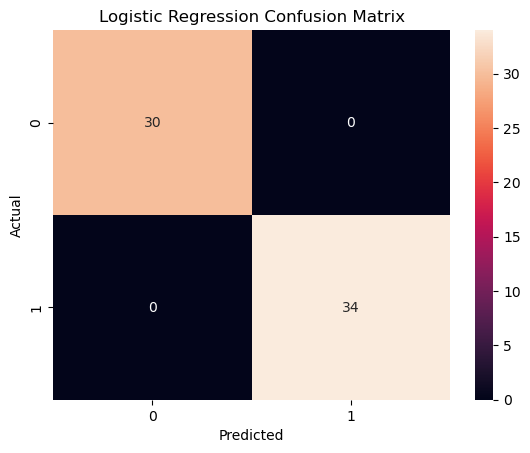

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_log)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


### The Confusion Matrix Of Perceptron By HeatMap

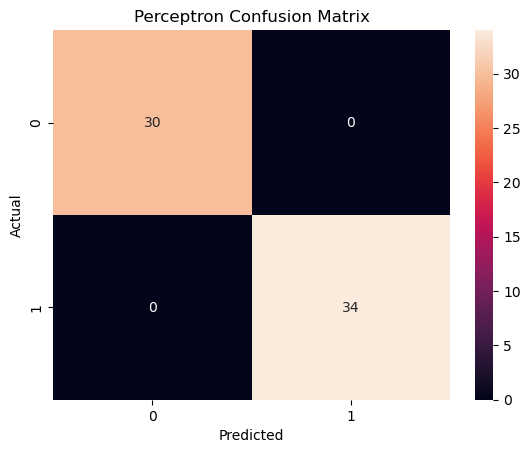

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d" , color = "red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Perceptron Confusion Matrix")
plt.show()


In [59]:
# Because The Accuarcy Is 100 For The 2 Models   >>>>> i Think There Is Overfit Soo I WANT tO mAKE sure That The 2 Models Are General 

In [62]:
from sklearn.metrics import accuracy_score

train_pred = perceptron.predict(x_train)
print("Train Accuracy:", accuracy_score(y_train, train_pred))

test_pred = perceptron.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, test_pred))



# As You Can See There Is No OVertfit Because The Accuarcy Of The Traing And The Test  Are The Same  And There Is No Gap Between Them

Train Accuracy: 1.0
Test Accuracy: 1.0


### Save The Model 

In [63]:
import joblib

joblib.dump(log_reg, "spam_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']